In [9]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
from numpy import loadtxt
from scipy import linalg

In [2]:
data = np.loadtxt("dax_data.txt", comments="#", delimiter="\n")

def create_polynomial_data_matrix(polynomial):
    data_matrix = np.empty((0,(polynomial)),dtype=float)
    i=0
    while i<len(data):
        j=0
        temp_pol = polynomial
        coeffecients = np.empty(0,dtype=float)
        while j<temp_pol:
            coeffecients = np.append(coeffecients,np.array([(i)**(j)]))
            j += 1
        coeffecients = np.sort(coeffecients)[::-1]
        data_matrix = np.append(data_matrix,[np.array(coeffecients)],axis=0)
        i += 1
        
    return data_matrix

In [30]:
AP3 = create_polynomial_data_matrix(7)

AP3T = AP3.transpose()


AP3T_dot_AP3 = np.dot(AP3T,AP3)

print(AP3T_dot_AP3.shape)

det_AP3T_dot_AP3 = np.linalg.det(AP3T_dot_AP3)
print(det_AP3T_dot_AP3)

# inv_AP3T_dot_AP3 = np.linalg.inv(AP3T_dot_AP3)
# print(AP3T_dot_AP3.shape)
# # print(np.dot(AP3T,z3).shape)

# # xp3 = np.dot(inv_AP3T_dot_AP3,np.dot(AP3T,data))
# print(AP3[::-1])

(7, 7)


TypeError: No loop matching the specified signature and casting was found for ufunc det

In [35]:
def p_regression(dep_var):
    approximate_output_matrix = np.empty(0)
    dep_var = dep_var[::-1]
    i=0;
    while i<len(data):
        j=0
        result = 0
        while j<len(dep_var):
            result = result+(dep_var[j]*(i**j))
            j += 1
        approximate_output_matrix = np.append(approximate_output_matrix,[result],axis=0)
        i += 1
    return approximate_output_matrix
pr3 = p_regression(xp3)



fig = plt.figure(figsize = (10,10))
plt.plot(pr3)

plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()

fig = plt.figure(figsize = (10,10))
plt.plot(data)
plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()



NameError: name 'xp3' is not defined

[-552071.78074667  308428.8050778   165259.27595596  133345.76339634
  -68266.79515694]


<Figure size 720x720 with 0 Axes>

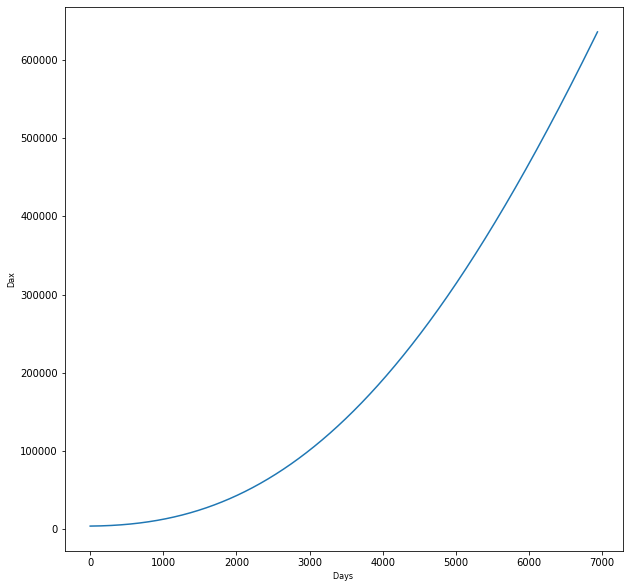

[-1.13772115e-10  1.76959612e-06  6.19115539e-03  8.98681087e-01
  4.10117378e+03]


In [97]:
#SVD
A = create_polynomial_data_matrix(5)
SVD = np.linalg.svd(A, full_matrices=True)

U = SVD[0]
S = SVD[1]
Vt = SVD[2]
# print("Shape of A",A.shape, "Shape of U",U.shape, "Shape of S",S.shape, "Shape of V",Vt.shape)
z_hat = np.dot(U.transpose(),data)
print(z_hat[0:5])

def compute_xHat():
    xHat = np.empty(0,dtype='float')
    i = 0
    while i<len(S):
        xiHat = z_hat[i]/S[i]
        xHat = np.append(xHat,np.array([xiHat]),axis=0)
        i += 1
    return xHat

xHat = compute_xHat()

fig = plt.figure(figsize = (10,10))
x_min = p_regression(np.dot(Vt,xHat))
fig = plt.figure(figsize = (10,10))
plt.plot(x_min)

plt.xlabel('Days ',fontsize=8)
plt.ylabel('Dax',fontsize=8)
plt.show()
print(np.dot(Vt,xHat))

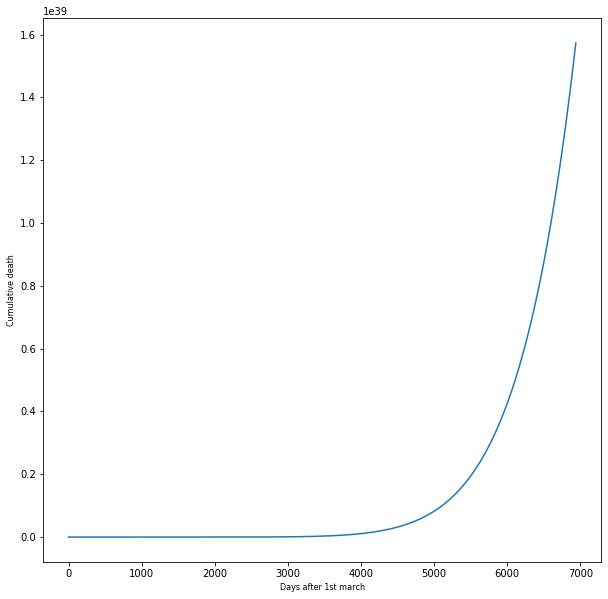

In [37]:
z = np.polyfit(data, (np.arange(0,len(data),1)), 9)
pr3 = p_regression(z[::-1])



fig = plt.figure(figsize = (10,10))
plt.plot(pr3)

plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()